<a href="https://colab.research.google.com/github/Hong071099/Le-Tuyet-Hong-Data-Science-Portfolio/blob/main/H%E1%BB%93ng's_KMeans_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail - KMeans Project

## I/ Import Data and Library

### 1/ Import Library

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.cluster import KMeans
from matplotlib import rcParams
from sklearn.decomposition import PCA
import squarify

import warnings
warnings.filterwarnings('ignore')


### 2/ Import Data

In [ ]:
# import data
import gdown

# Download Data
file_id = "1od0TjqVcbtPxonZzt90yhSgMqERMwZfk"
output_file = "Online_Retail.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)
df = pd.read_csv("Online_Retail.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1od0TjqVcbtPxonZzt90yhSgMqERMwZfk
To: /content/Online_Retail.csv
100%|██████████| 44.5M/44.5M [00:00<00:00, 71.0MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Create order value
df['OrderValue'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


## II/ Data Explore

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   OrderValue   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
# Change the Datatypes
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   OrderValue   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
# Get overview of the Dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
OrderValue,541909.0,17.987795,-168469.6,3.4,9.75,17.4,168469.6,378.810824


### 1/ Duplicates

In [ ]:
# Check Duplicates
df.duplicated().sum()

np.int64(5268)

In [ ]:
# Drop Duplicate
df.drop_duplicates(inplace=True)

### 2/ Missing Values

In [ ]:
# Check missing value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
OrderValue,0


<Axes: >

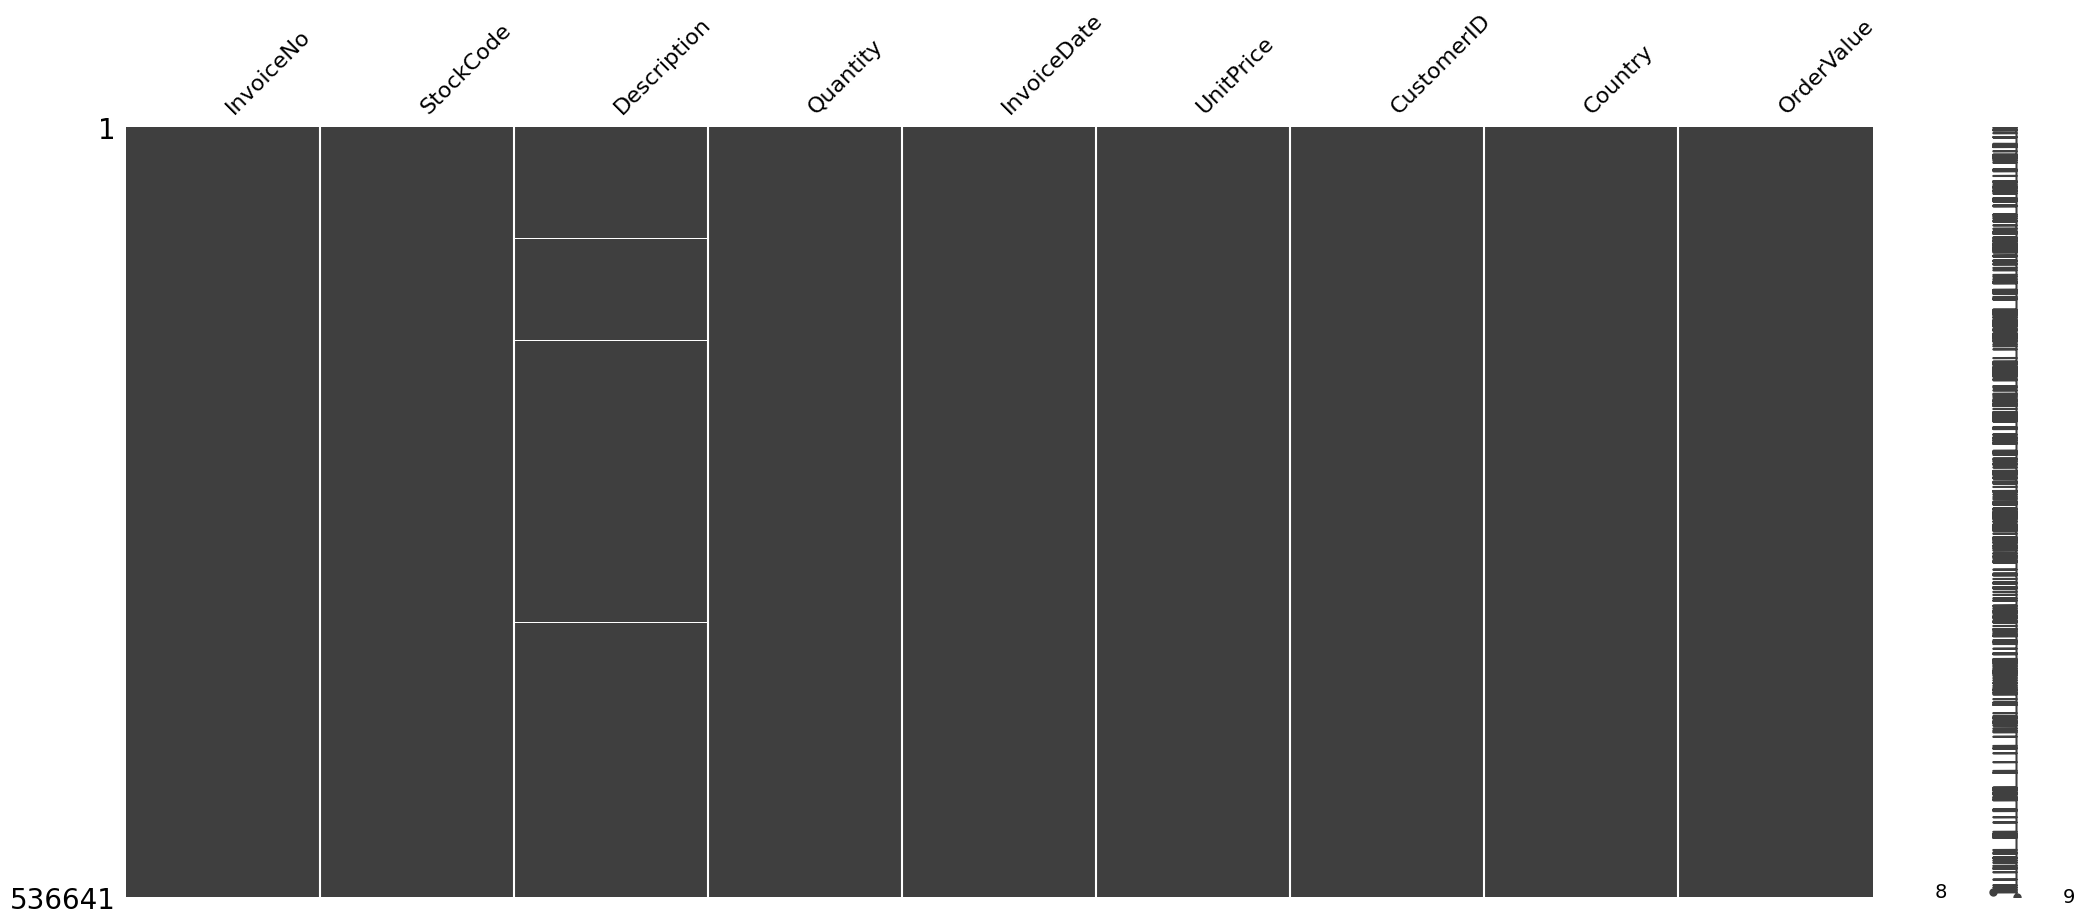

In [ ]:
missingno.matrix(df)

<Axes: >

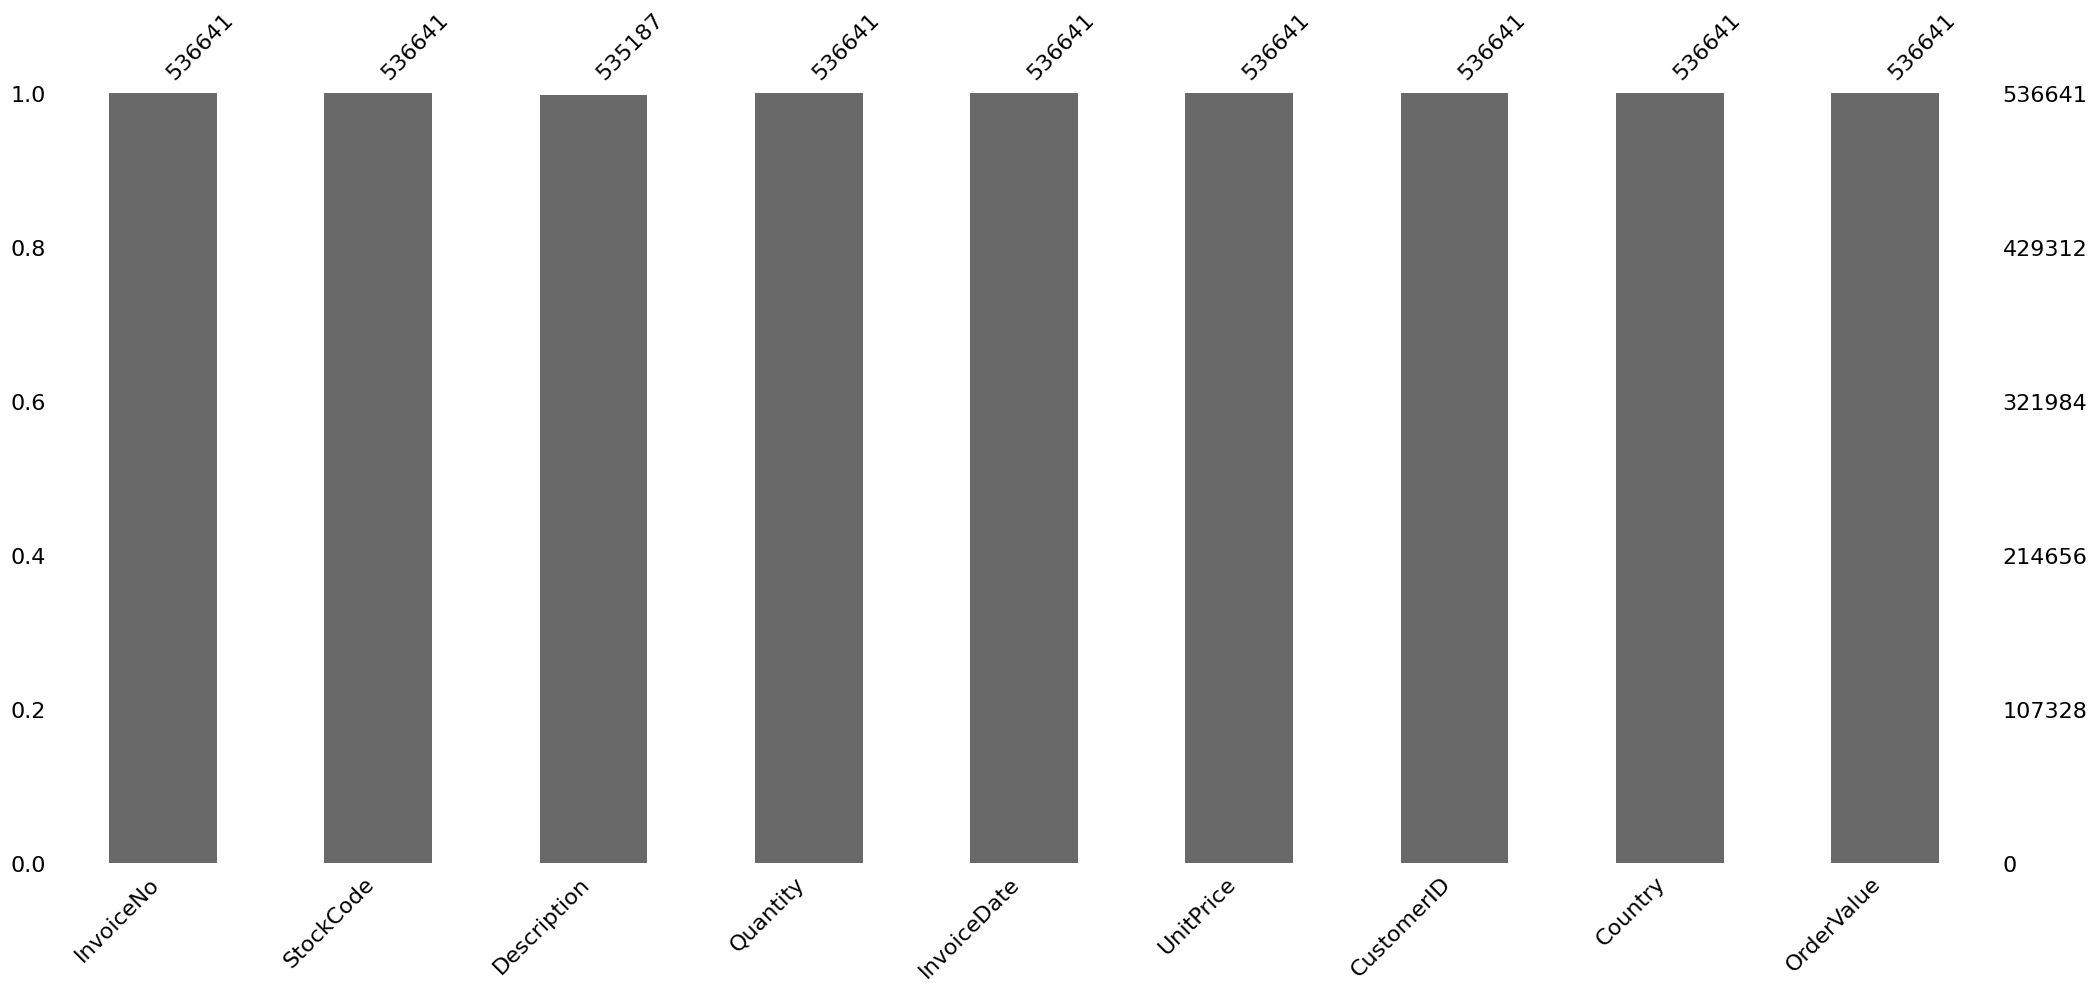

In [ ]:
missingno.bar(df)

In [ ]:
#Drop missing value

df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
 8   OrderValue   535187 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.8+ MB


### 3/ Outliers

In [ ]:
df.describe([0.01,0.05,0.25,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,90%,95%,99%,max,std
Quantity,535187.0,9.671593,-80995.0,-2.0,1.0,1.0,3.0,10.0,24.0,30.0,100.0,80995.0,219.059056
InvoiceDate,535187,2011-07-04 11:43:44.485273600,2010-12-01 08:26:00,2010-12-03 11:13:00,2010-12-13 09:39:00,2011-03-28 11:34:00,2011-07-19 15:38:00,2011-10-19 08:20:00,2011-11-21 15:53:00,2011-11-30 14:42:00,2011-12-08 09:28:00,2011-12-09 12:50:00,NaN
UnitPrice,535187.0,4.645242,-11062.06,0.29,0.42,1.25,2.08,4.13,7.95,9.95,18.0,38970.0,97.36481
OrderValue,535187.0,18.1731,-168469.6,-6.75,0.85,3.75,9.9,17.4,31.8,59.4,182.04,168469.6,381.171824


In [ ]:
q_cap_95 = df['Quantity'].quantile(0.95)
order_value_cap_95 = df['OrderValue'].quantile(0.95)

In [ ]:
q_flr = 0
q_cap = q_cap_95
order_value_cap = order_value_cap_95

df = df[(df['Quantity']>=q_flr)]
df = df[(df['OrderValue']>= q_flr)]
df = df[(df['Quantity']< q_cap) & (df['OrderValue']< order_value_cap)]

df.describe([0.01,0.05,0.25,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,90%,95%,99%,max,std
Quantity,487163.0,5.712675,1.0,1.0,1.0,1.0,3.0,8.0,12.0,24.0,25.0,29.0,6.151284
InvoiceDate,487163,2011-07-04 15:33:43.812686848,2010-12-01 08:26:00,2010-12-03 11:19:00,2010-12-13 09:35:00,2011-03-27 15:33:00,2011-07-19 17:17:00,2011-10-19 13:43:30,2011-11-22 08:34:00,2011-11-30 15:13:00,2011-12-08 09:28:00,2011-12-09 12:50:00,NaN
UnitPrice,487163.0,3.273685,0.0,0.29,0.42,1.25,2.1,4.13,7.9,9.95,16.95,58.5,3.553974
OrderValue,487163.0,11.257902,0.0,0.55,1.25,3.45,8.5,16.5,23.6,30.6,46.8,59.4,9.838808


## III/ Data Preparation

In [ ]:
# Add more metrics

customer_df = df.groupby('CustomerID').agg({
    'OrderValue':sum,
    'InvoiceNo': lambda x:x.nunique(),
    'Description': lambda x:x.nunique()
})

customer_df.columns = ['TotalValue','OrderCount','UniqueProduct']
customer_df['AverageValue'] = customer_df['TotalValue']/customer_df['OrderCount']

customer_df.head()

,TotalValue,OrderCount,UniqueProduct,AverageValue
CustomerID,,,,
12347.0,3398.48,7,98,485.497143
12348.0,210.20,4,7,52.550000
12349.0,1244.35,1,68,1244.350000
12350.0,334.40,1,17,334.400000
12352.0,1505.74,7,58,215.105714


### Rule-Based Percentile

In [ ]:
# Percentile
def percentile_for_metric (columns, percent_list=[0.25,0.5,0.75]):
  percentiles = {}
  for columns in ['TotalValue','OrderCount','UniqueProduct','AverageValue']:
    percentiles[columns] = customer_df[columns].quantile(percent_list).to_dict()
  return percentiles


print(percentile_for_metric(customer_df))


{'TotalValue': {0.25: 223.36, 0.5: 501.86, 0.75: 1190.2124999999999}, 'OrderCount': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0}, 'UniqueProduct': {0.25: 15.0, 0.5: 35.0, 0.75: 76.0}, 'AverageValue': {0.25: 134.45506756756757, 0.5: 218.34499999999997, 0.75: 336.40333333333336}}


In [ ]:
 # Calculate percentiles for each metric
metrics = ['TotalValue', 'OrderCount', 'UniqueProduct', 'AverageValue']
percentiles = {}

for metric in metrics:
    percentiles[metric] = {
        'p25': customer_df[metric].quantile(0.25),
        'p50': customer_df[metric].quantile(0.50),
        'p75': customer_df[metric].quantile(0.75)
    }

# Scoring function
def scoring(value, percentiles_dict):
    if value <= percentiles_dict['p25']:
        return 1
    elif value <= percentiles_dict['p50']:
        return 2
    elif value <= percentiles_dict['p75']:
        return 3
    else:
        return 4

# Apply scoring
for metric in metrics:
    score_col = f"{metric}_Score"
    customer_df[score_col] = customer_df[metric].apply(
        lambda x: scoring(x, percentiles[metric])
    )

customer_df.head()

,TotalValue,OrderCount,UniqueProduct,AverageValue,TotalValue_Score,OrderCount_Score,UniqueProduct_Score,AverageValue_Score
CustomerID,,,,,,,,
12347.0,3398.48,7,98,485.497143,4,4,4,4
12348.0,210.20,4,7,52.550000,1,3,1,1
12349.0,1244.35,1,68,1244.350000,4,1,3,4
12350.0,334.40,1,17,334.400000,2,1,2,3
12352.0,1505.74,7,58,215.105714,4,4,3,2


In [ ]:
#Weighted Average
#TotalValue: 30%, OrderValue: 30%, UniqueProduct: 20%, AverageValue: 20%

customer_df['FinalScore'] = customer_df['TotalValue_Score']*0.3 + customer_df['OrderCount_Score']*0.3 + customer_df['UniqueProduct_Score']*0.2 + customer_df['AverageValue_Score']*0.2
customer_df.head()

,TotalValue,OrderCount,UniqueProduct,AverageValue,TotalValue_Score,OrderCount_Score,UniqueProduct_Score,AverageValue_Score,FinalScore
CustomerID,,,,,,,,,
12347.0,3398.48,7,98,485.497143,4,4,4,4,4.0
12348.0,210.20,4,7,52.550000,1,3,1,1,1.6
12349.0,1244.35,1,68,1244.350000,4,1,3,4,2.9
12350.0,334.40,1,17,334.400000,2,1,2,3,1.9
12352.0,1505.74,7,58,215.105714,4,4,3,2,3.4


In [ ]:
# Segmetation
def segment(score):
  if score < 1:
    return "Cluster 1"
  elif score < 2:
    return "Cluster 2"
  elif score < 3:
    return "Cluster 3"
  else:
    return "Cluster 4"

customer_df['Segment'] = customer_df['FinalScore'].apply(segment)
customer_df.head()

,TotalValue,OrderCount,UniqueProduct,AverageValue,TotalValue_Score,OrderCount_Score,UniqueProduct_Score,AverageValue_Score,FinalScore,Segment
CustomerID,,,,,,,,,,
12347.0,3398.48,7,98,485.497143,4,4,4,4,4.0,Cluster 4
12348.0,210.20,4,7,52.550000,1,3,1,1,1.6,Cluster 2
12349.0,1244.35,1,68,1244.350000,4,1,3,4,2.9,Cluster 3
12350.0,334.40,1,17,334.400000,2,1,2,3,1.9,Cluster 2
12352.0,1505.74,7,58,215.105714,4,4,3,2,3.4,Cluster 4


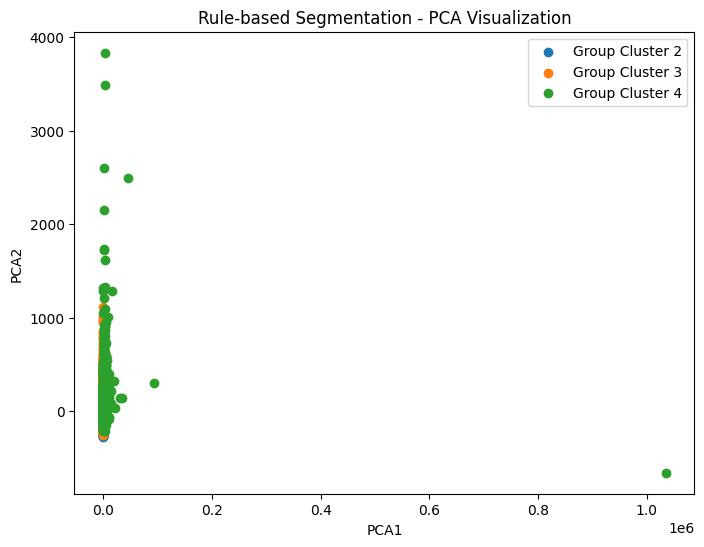

In [ ]:
# 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_df[['TotalValue', 'OrderCount', 'UniqueProduct', 'AverageValue']])

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=customer_df.index)
pca_df['Segment'] = customer_df['Segment']

# 4. Visualization
plt.figure(figsize=(8,6))
for seg in sorted(pca_df['Segment'].unique()):
    subset = pca_df[pca_df['Segment'] == seg]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Group {seg}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Rule-based Segmentation - PCA Visualization')
plt.legend()
plt.show()


### Test Percentile qcut

In [ ]:
# Percentile

weights = {
    'TotalValue': 0.3,
    'OrderCount': 0.3,
    'UniqueProduct': 0.2,
    'AverageValue': 0.2
}
scored_df = customer_df.copy()

def rule_based_scoring_weighted(customer_df, cols, weights):
    for col in cols:
        scored_df[f"{col}_score"] = pd.qcut(
            scored_df[col],
            q=[0, 0.25, 0.5, 0.75, 1],
            labels=False,
            duplicates= 'drop'
        ) + 1

    # Weighted average
    scored_df['FinalScore'] = sum(
        scored_df[f"{col}_score"] * weights[col] for col in cols
    )
    return scored_df

print(rule_based_scoring_weighted(customer_df, ['TotalValue', 'OrderCount', 'UniqueProduct', 'AverageValue'], weights))



            TotalValue  OrderCount  UniqueProduct  AverageValue  \
CustomerID                                                        
12347.0        3398.48           7             98    485.497143   
12348.0         210.20           4              7     52.550000   
12349.0        1244.35           1             68   1244.350000   
12350.0         334.40           1             17    334.400000   
12352.0        1505.74           7             58    215.105714   
...                ...         ...            ...           ...   
18281.0          80.82           1              7     80.820000   
18282.0         164.13           2             11     82.065000   
18283.0        2045.53          16            272    127.845625   
18287.0         994.76           3             47    331.586667   
nan         1037437.09        1491           3392    695.799524   

            TotalValue_score  OrderCount_score  UniqueProduct_score  \
CustomerID                                               

In [ ]:
scored_df['Segment'] = pd.qcut(scored_df['FinalScore'], q=4, labels=False)

In [ ]:
scored_df.head()

,TotalValue,OrderCount,UniqueProduct,AverageValue,TotalValue_score,OrderCount_score,UniqueProduct_score,AverageValue_score,FinalScore,Segment
CustomerID,,,,,,,,,,
12347.0,3398.48,7,98,485.497143,4,3,4,4,3.7,3
12348.0,210.20,4,7,52.550000,1,2,1,1,1.3,0
12349.0,1244.35,1,68,1244.350000,4,1,3,4,2.9,2
12350.0,334.40,1,17,334.400000,2,1,2,3,1.9,1
12352.0,1505.74,7,58,215.105714,4,3,3,2,3.1,3


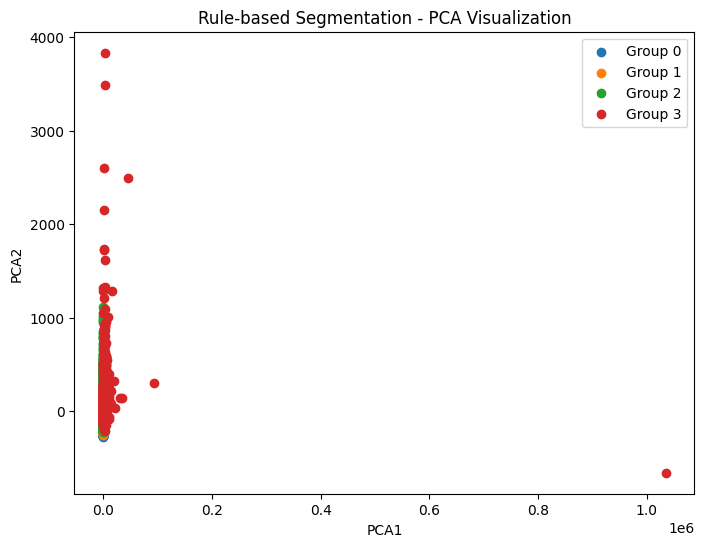

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scored_df[['TotalValue', 'OrderCount', 'UniqueProduct', 'AverageValue']])

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=scored_df.index)
pca_df['Segment'] = scored_df['Segment']

# 4. Visualization
plt.figure(figsize=(8,6))
for seg in sorted(pca_df['Segment'].unique()):
    subset = pca_df[pca_df['Segment'] == seg]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Group {seg}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Rule-based Segmentation - PCA Visualization')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = scored_df[['TotalValue','OrderCount','UniqueProduct','AverageValue']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Labels = Segments from rule-based FinalScore
labels = scored_df['Segment']
silhouette_rule = silhouette_score(X_scaled, labels)

print(scored_df[['FinalScore','Segment']])
print("Silhouette Score (Rule-based 4 segments):", round(silhouette_rule,4))

            FinalScore  Segment
CustomerID                     
12347.0            3.7        3
12348.0            1.3        0
12349.0            2.9        2
12350.0            1.9        1
12352.0            3.1        3
...                ...      ...
18281.0            1.0        0
18282.0            1.0        0
18283.0            3.1        3
18287.0            2.7        2
nan                3.7        3

[4196 rows x 2 columns]
Silhouette Score (Rule-based 4 segments): 0.0525


In [ ]:
X = scored_df[['TotalValue','OrderCount','UniqueProduct','AverageValue']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Labels = Segments from rule-based FinalScore
labels = pca_df['Cluster']
silhouette_rule = silhouette_score(X_scaled, labels)

print(pca_df[['Cluster']])
print("Silhouette Score (Rule-based 4 segments):", round(silhouette_rule,4))

            Cluster
CustomerID         
12347.0           2
12348.0           1
12349.0           3
12350.0           3
12352.0           2
...             ...
18281.0           1
18282.0           1
18283.0           2
18287.0           2
nan               2

[4196 rows x 1 columns]
Silhouette Score (Rule-based 4 segments): 0.1123


In [ ]:
pca_df.head()

,PCA1,PCA2,Cluster
CustomerID,,,
12347.0,2.592254,0.234588,2
12348.0,-1.660293,-1.530969,1
12349.0,0.849329,2.421975,3
12350.0,-1.152326,1.782538,3
12352.0,1.463680,-0.824750,2
